In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


In [2]:
# Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Read data set

In [3]:
Mel_less = pd.read_csv('../input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')
Mel_full = pd.read_csv('../input/melbourne-housing-market/Melbourne_housing_FULL.csv')

Check the data set

In [4]:
Mel_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
Mel_less.shape

(63023, 13)

In [6]:
Mel_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
Mel_full.shape

(34857, 21)

In [8]:
Mel_less.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [9]:
Mel_full.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Drop the null value of Mel_less dataset

In [10]:
Mel_less = Mel_less.dropna(axis = 0, how ='any')

In [11]:
Mel_less.shape

(48433, 13)

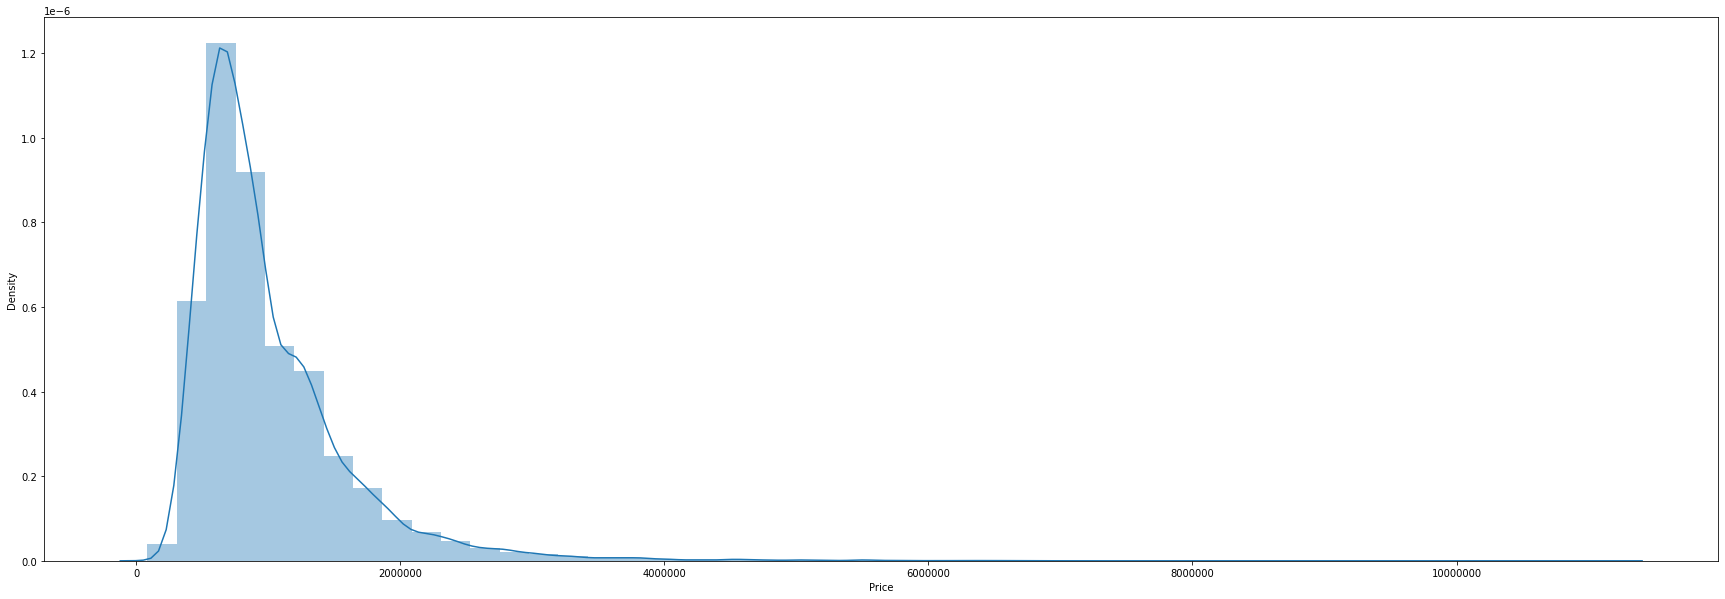

In [12]:
#Price distribution
f, ax = plt.subplots(figsize=(30, 10))
sns.distplot(Mel_less['Price'],hist = True, kde =True)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

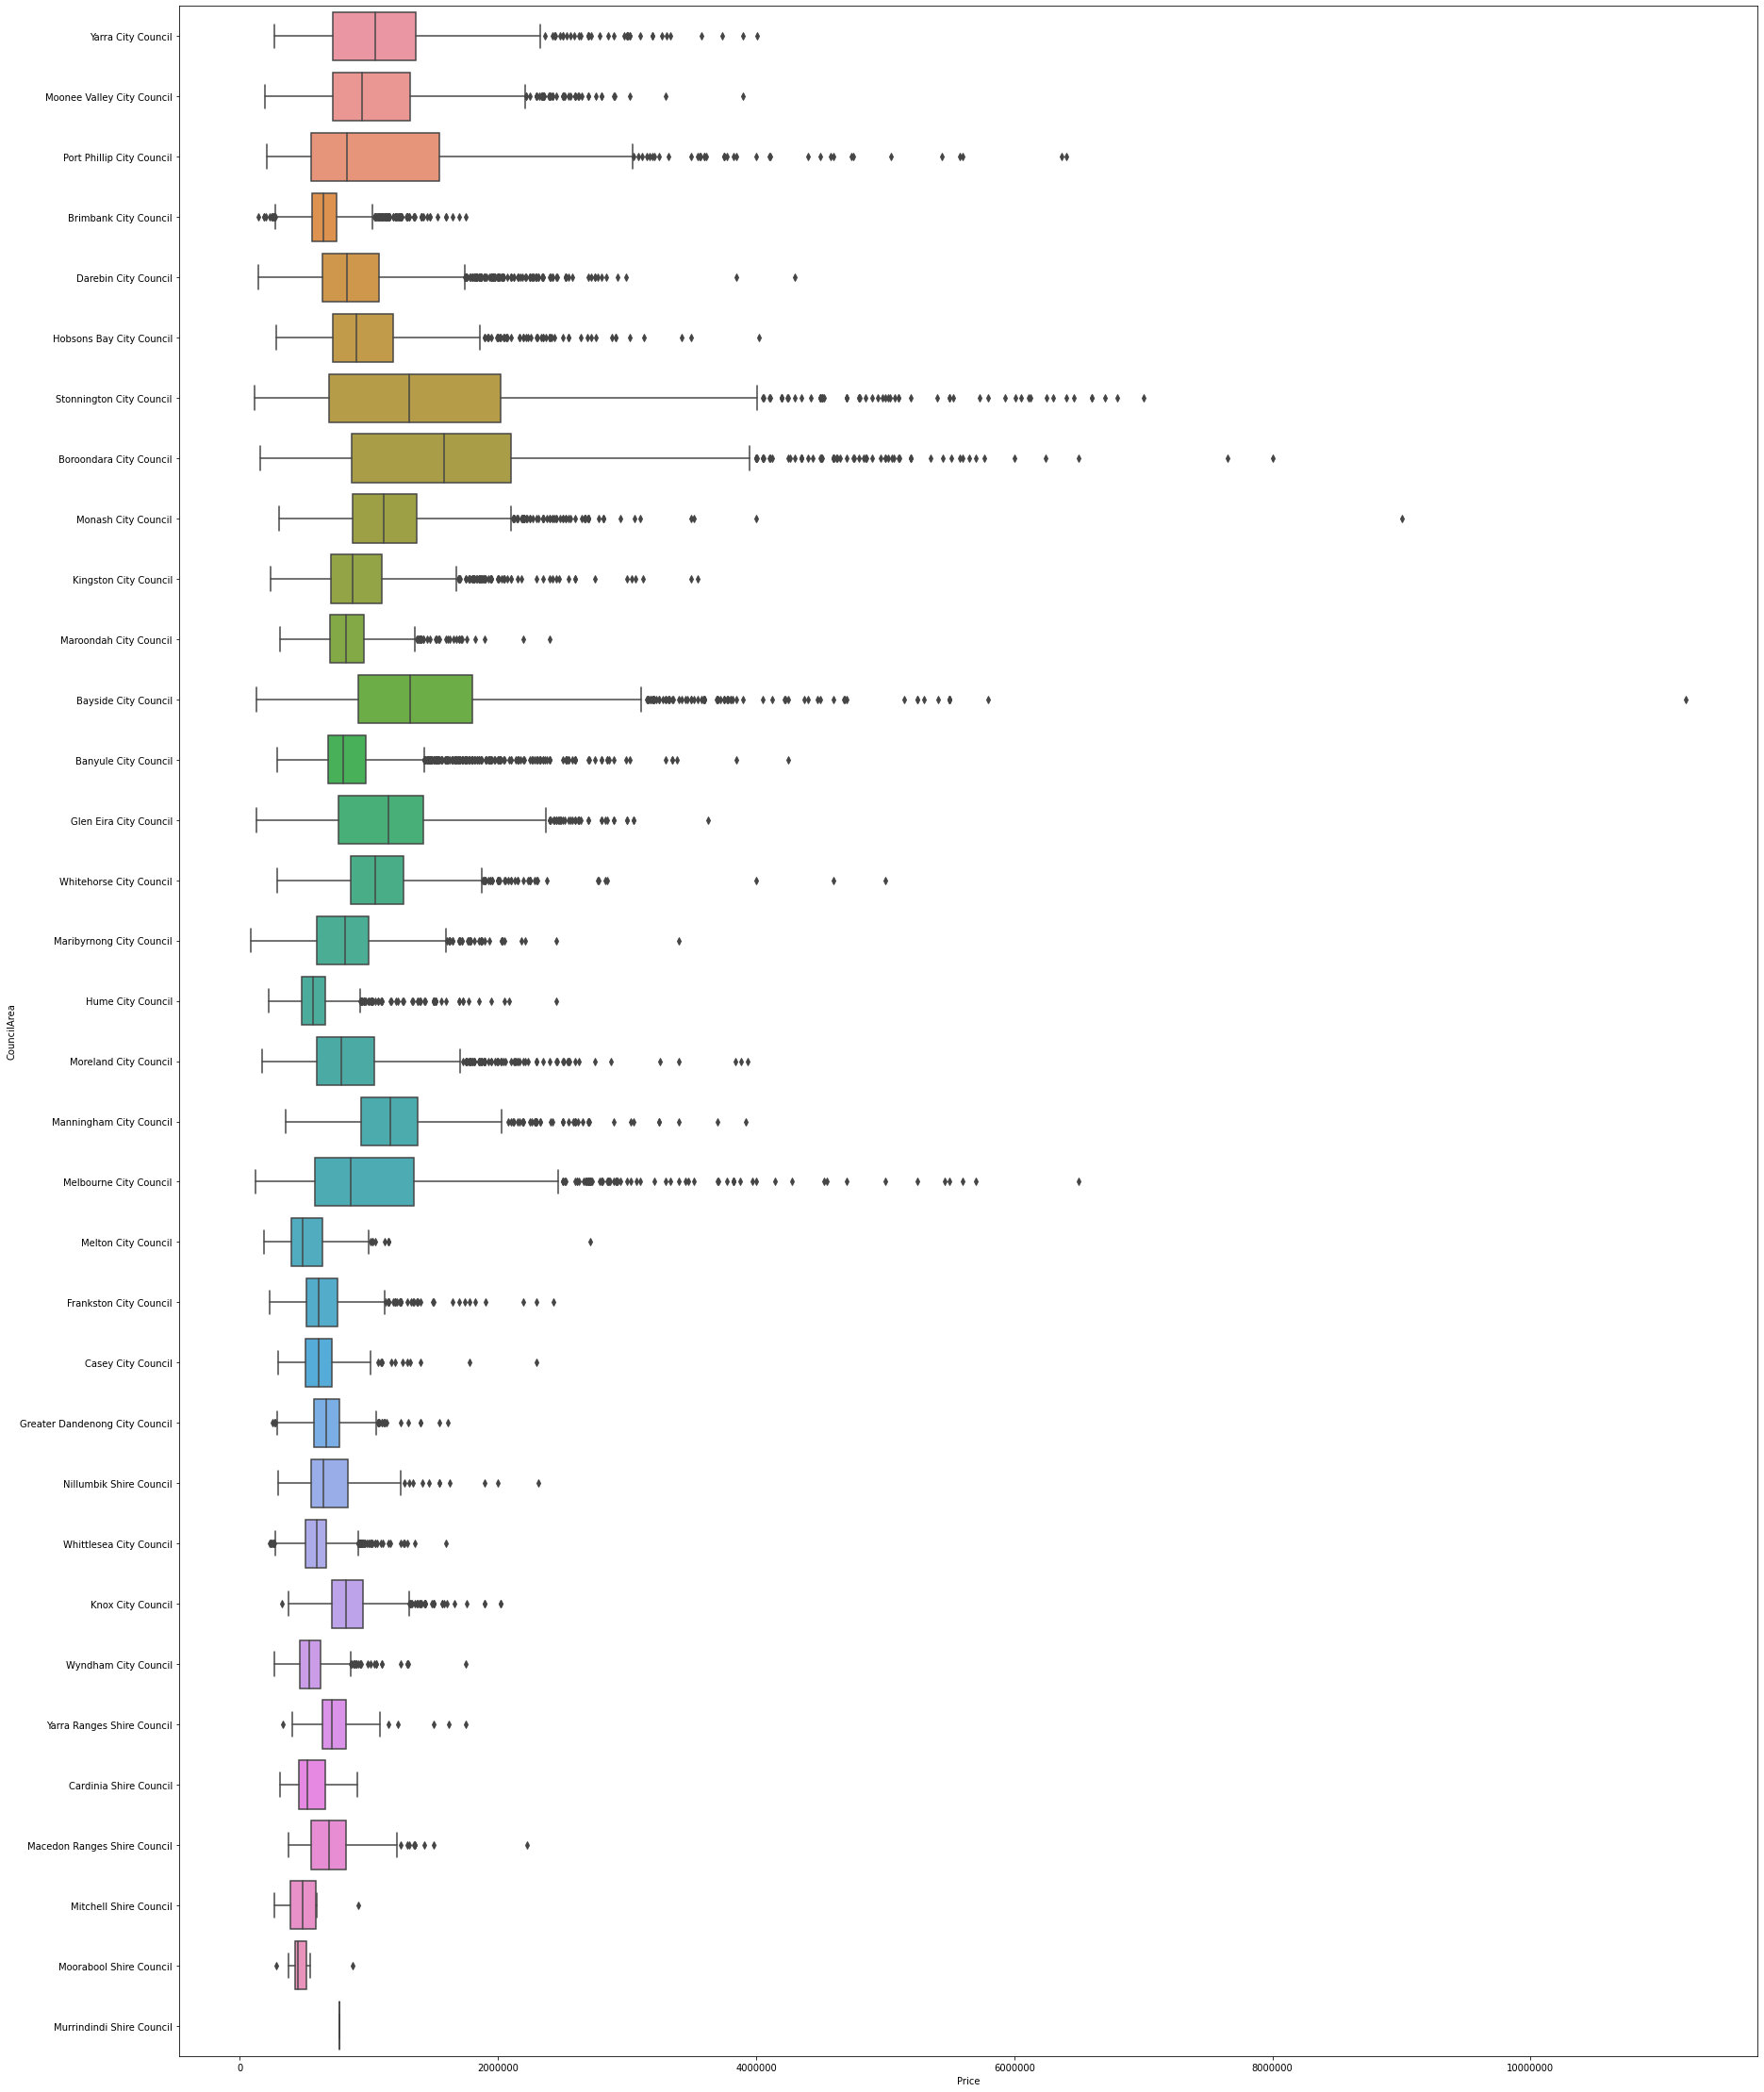

In [13]:
#Price box charts for each city
f, ax = plt.subplots(figsize=(30, 40))
sns.set_theme(style="whitegrid")
sns.boxplot(data=Mel_less, x = Mel_less.Price,y = 'CouncilArea')
sns.set(font_scale = 3)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Median price

In [14]:
Price_median = Mel_less.groupby('CouncilArea')['Price'].median().reset_index(name='Price_median')

In [15]:
Price_median

,CouncilArea,Price_median
0,Banyule City Council,805000.0
1,Bayside City Council,1320000.0
2,Boroondara City Council,1580000.0
3,Brimbank City Council,650000.0
4,Cardinia Shire Council,522750.0
5,Casey City Council,613000.0
6,Darebin City Council,830000.0
7,Frankston City Council,610000.0
8,Glen Eira City Council,1150000.0
9,Greater Dandenong City Council,670000.0


In [16]:
#Sort the median house price for each city
Price_median = Price_median.sort_values(by ='Price_median',ascending = False)

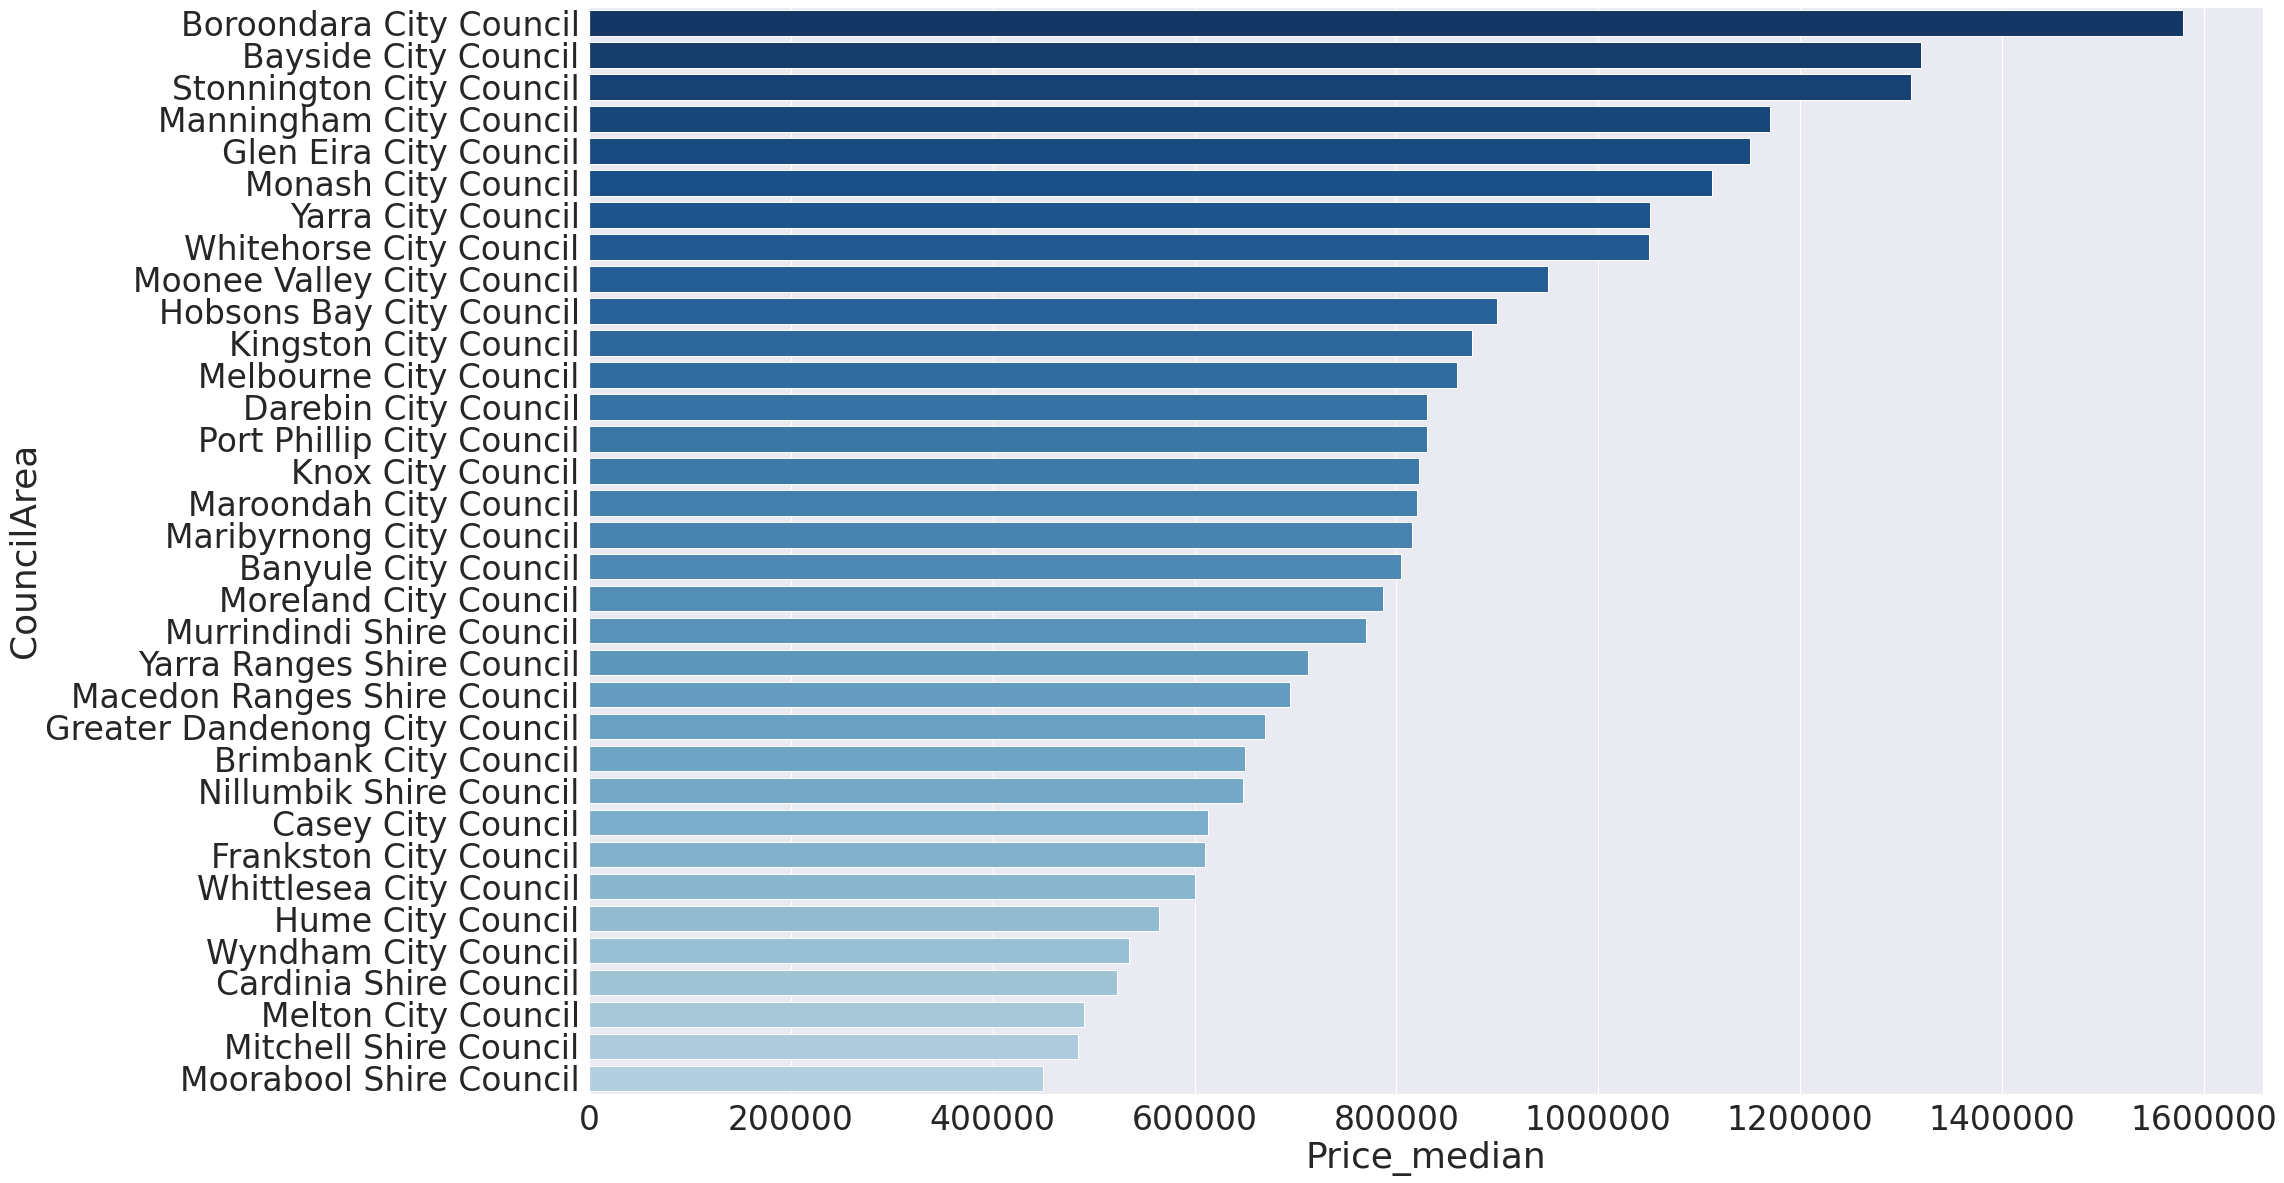

In [17]:
#Median price bar charts for each city
f, ax = plt.subplots(figsize=(30, 20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale = 2)
sns.barplot(data=Price_median, x = 'Price_median',y = 'CouncilArea',palette=sns.color_palette('Blues_r',50))
plt.show()

Average price

In [18]:
Price_mean = Mel_less.groupby('CouncilArea')['Price'].mean().round(2).reset_index(name='Price_mean')

In [19]:
#Sort the mean house price for each city
Price_mean = Price_mean.sort_values(by ='Price_mean',ascending = False)

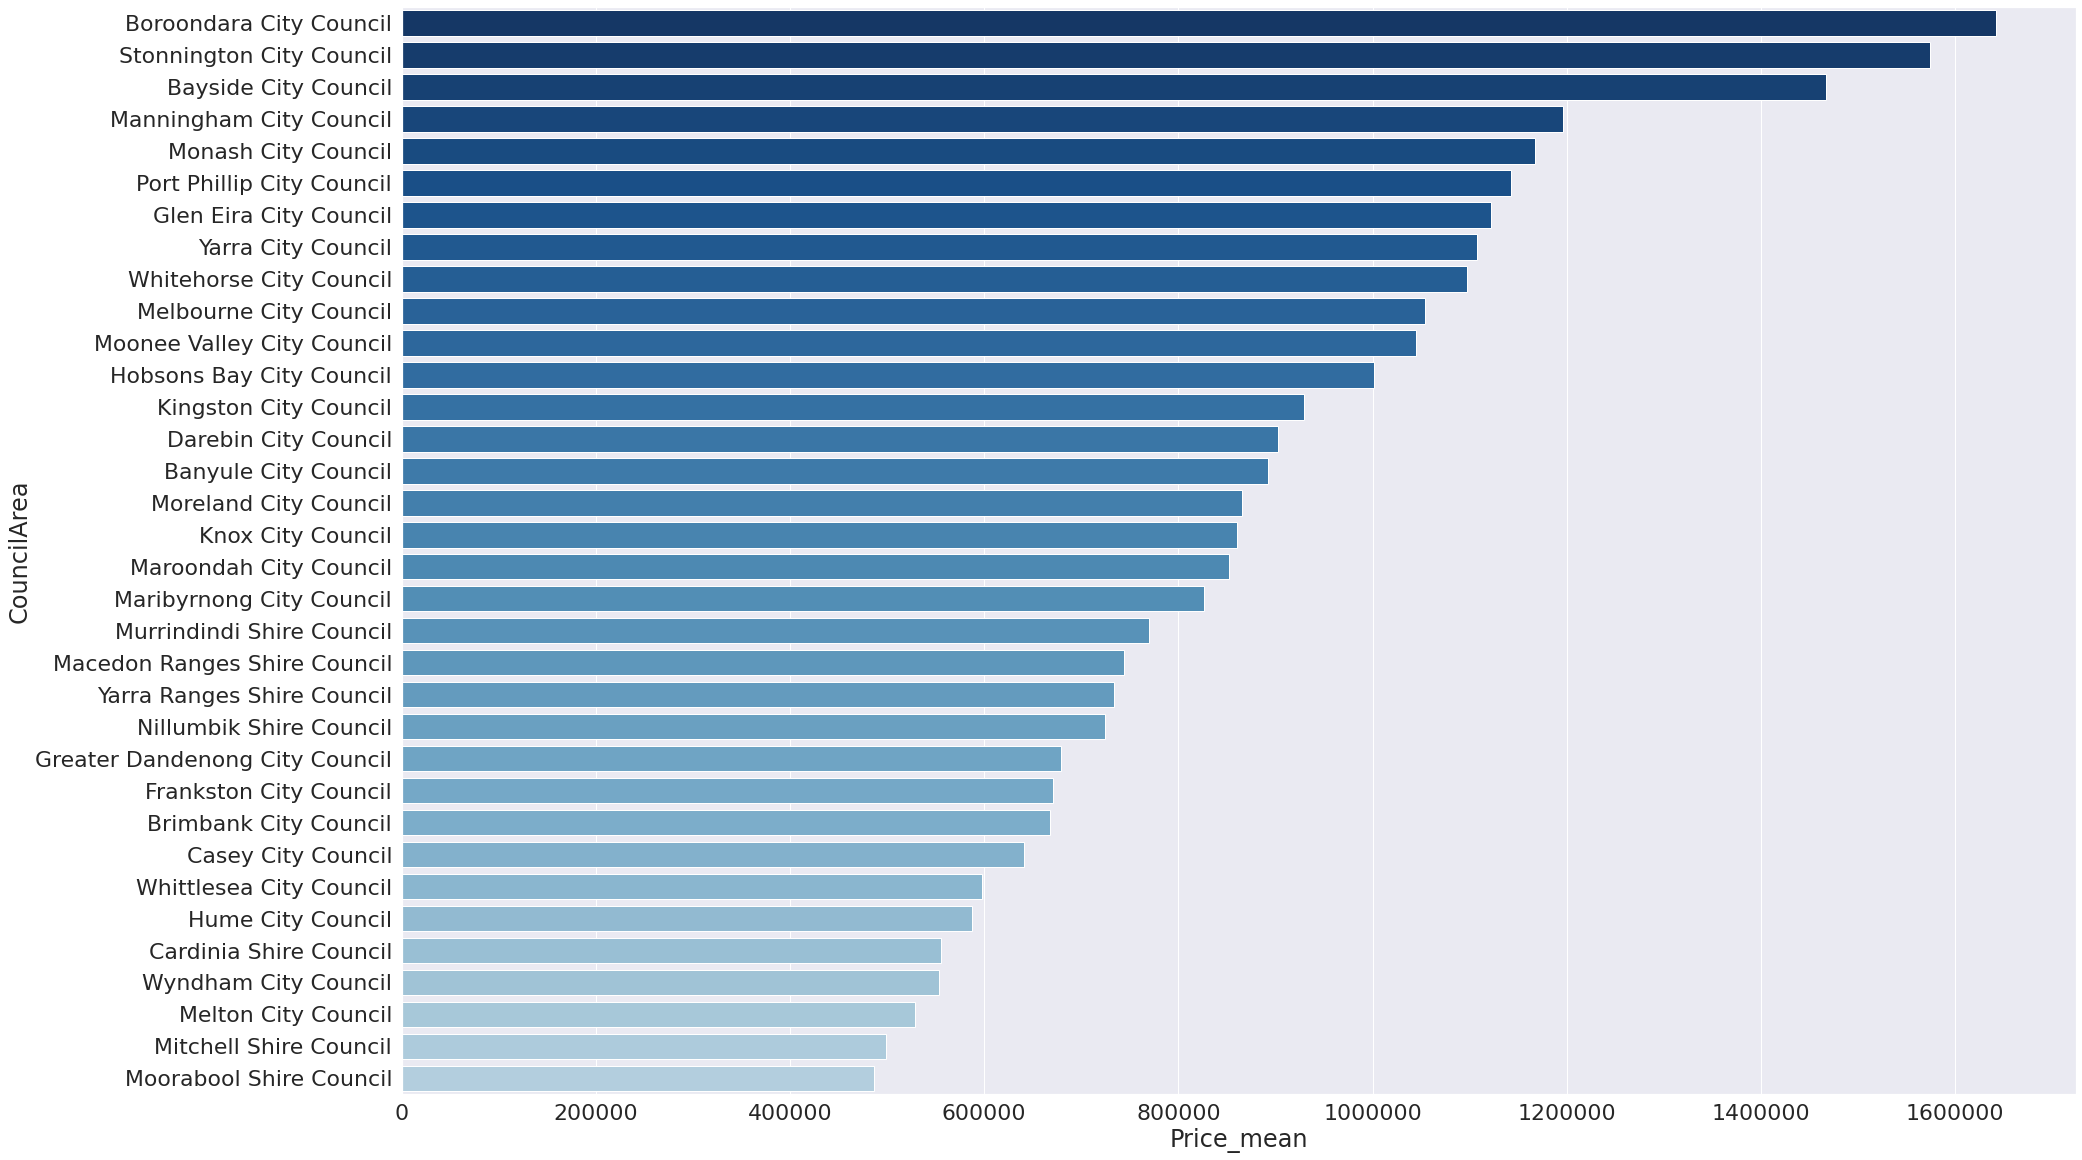

In [20]:
#Average price bar charts for each city
f, ax = plt.subplots(figsize=(30, 20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale = 2)
sns.barplot(data=Price_mean, x = 'Price_mean',y = 'CouncilArea',palette=sns.color_palette('Blues_r',50))
plt.show()

Processing Mel_full data set

In [21]:
Mel_full = Mel_full.dropna(subset=['Price', 'Landsize','Lattitude','Longtitude','CouncilArea'])

In [22]:
Mel_full.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            6
Bathroom            9
Car               281
Landsize            0
BuildingArea     8587
YearBuilt        7347
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [23]:
Mel_full[Mel_full['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019.0
23,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81100,145.00670,Northern Metropolitan,4019.0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0
29,Abbotsford,7/20 Abbotsford St,1,u,441000.0,SP,Greg,14/05/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019.0
40,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,18/03/2017,2.5,3067.0,...,2.0,2.0,0.0,NaN,2010.0,Yarra City Council,-37.80930,144.99590,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19685,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,29/07/2017,5.0,3182.0,...,1.0,1.0,0.0,82.00,1930.0,Port Phillip City Council,-37.85911,144.97900,Southern Metropolitan,13240.0
19696,Surrey Hills,6/91 Warrigal Rd,3,u,1050000.0,PI,hockingstuart,29/07/2017,10.2,3127.0,...,2.0,2.0,0.0,NaN,NaN,Boroondara City Council,-37.83358,145.09884,Southern Metropolitan,5457.0
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,29/07/2017,12.9,3043.0,...,1.0,1.0,0.0,66.32,1980.0,Brimbank City Council,-37.69815,144.88019,Western Metropolitan,3296.0
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay City Council,-37.85588,144.89936,Western Metropolitan,6380.0


In [24]:
Mel_full = Mel_full.drop(Mel_full[Mel_full['Landsize']==0].index)

In [25]:
#Calculate the price per square metre of each property
Mel_full['$/m2 land'] = Mel_full['Price'] / Mel_full['Landsize']

In [26]:
Mel_full['$/m2 land'].head(10)

1      7326.732673
2      6634.615385
4     10932.835821
5      9042.553191
6     13333.333333
10     5198.895028
11     7657.142857
14     6390.625000
18     4986.363636
24     6308.411215
Name: $/m2 land, dtype: float64

Average price per square meter

In [27]:
Avg_Price_Per_Square_Meter = Mel_full.groupby('CouncilArea')['$/m2 land'].mean().round(2).reset_index(name='Avg_Price_Per_Square_Meter')

In [28]:
#Sort the value
Avg_Price_Per_Square_Meter = Avg_Price_Per_Square_Meter.sort_values(by ='Avg_Price_Per_Square_Meter',ascending = False)

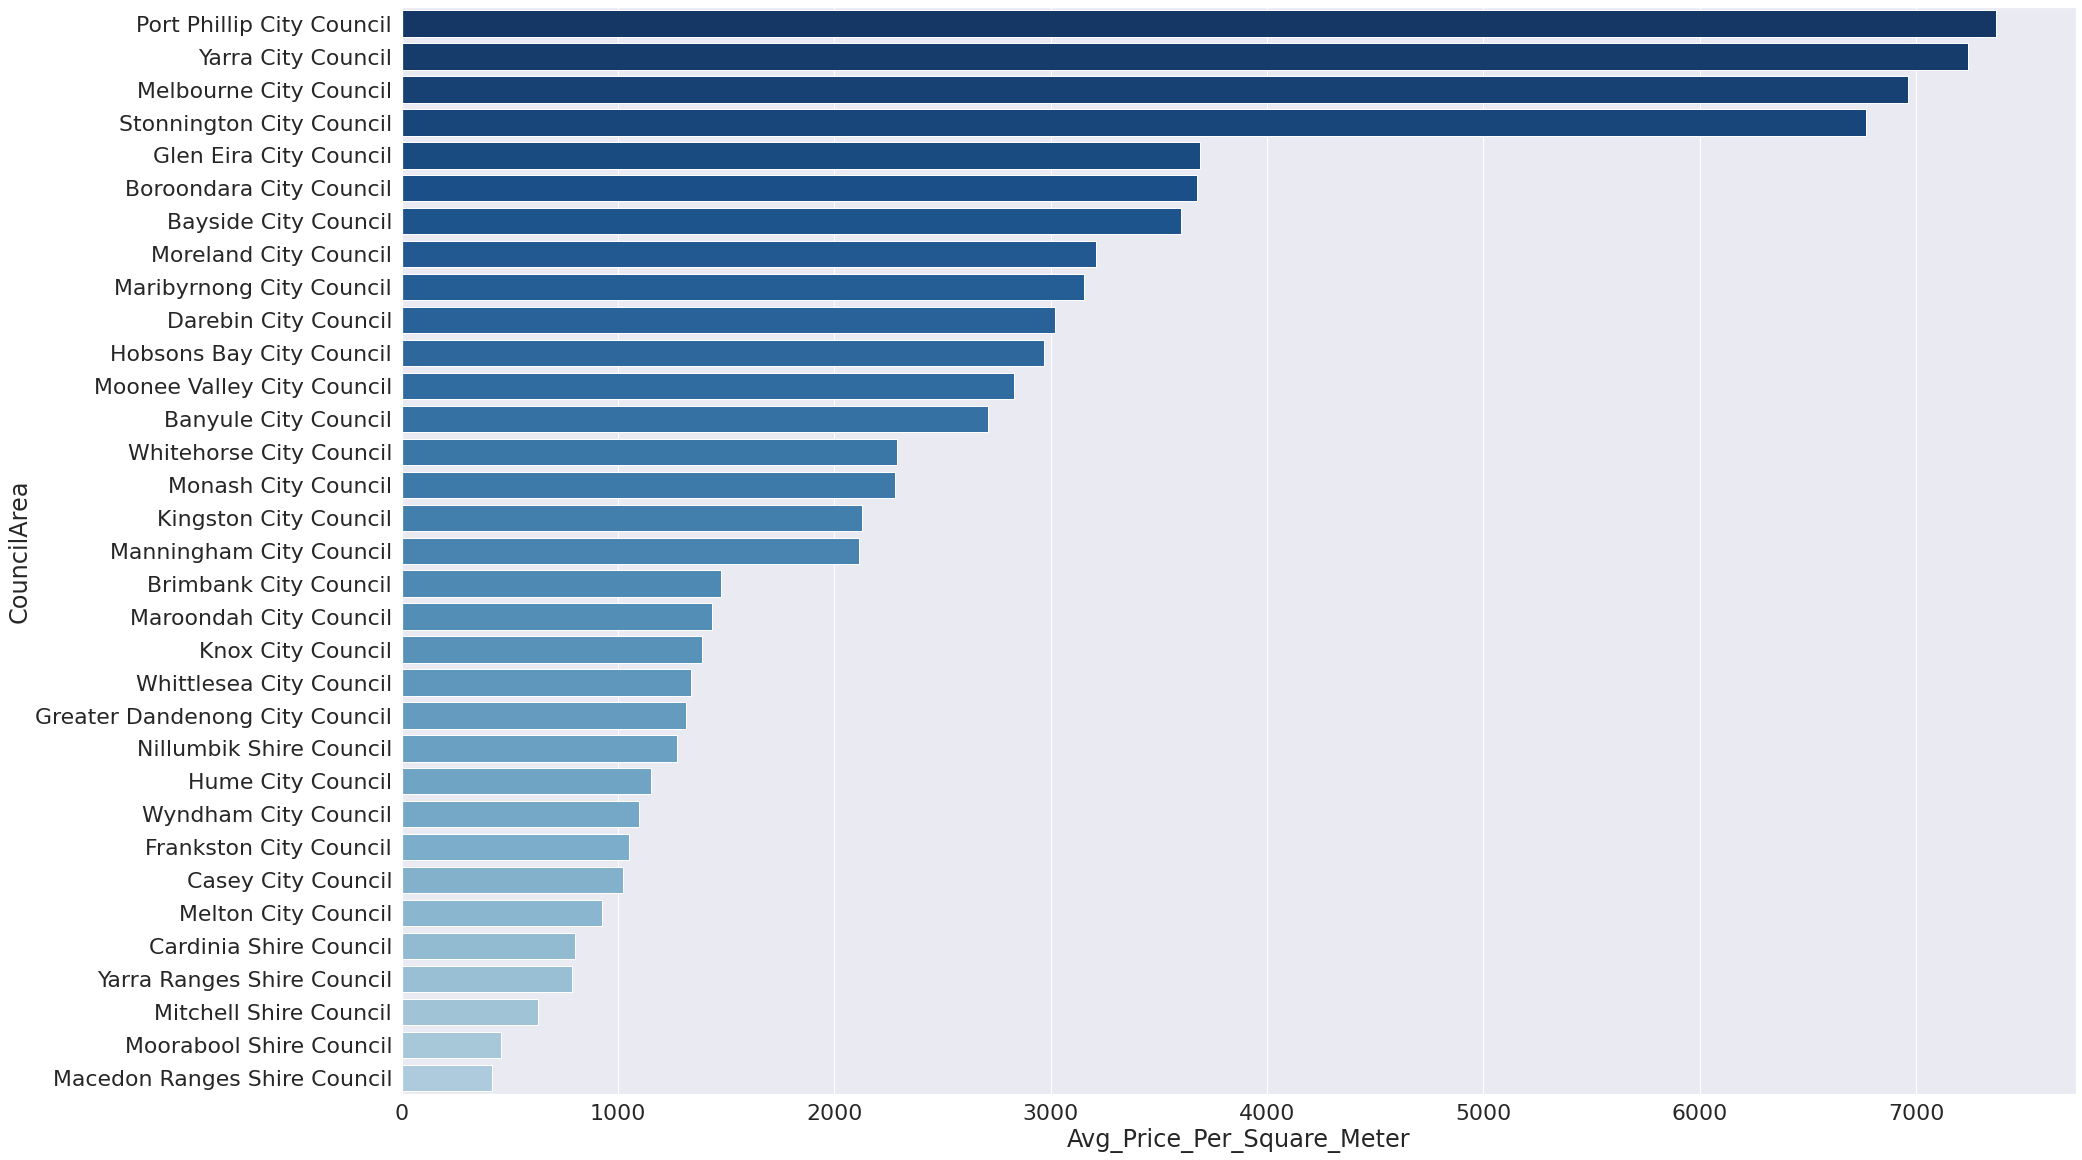

In [29]:
#Visualization Ranking
f, ax = plt.subplots(figsize=(30, 20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale = 2)
sns.barplot(data=Avg_Price_Per_Square_Meter, x = 'Avg_Price_Per_Square_Meter',y = 'CouncilArea',palette=sns.color_palette('Blues_r',50))
plt.show()

Median price per square meter

In [30]:
Median_Price_Per_Square_Meter = Mel_full.groupby('CouncilArea')['$/m2 land'].median().round(2).reset_index(name='Median_Price_Per_Square_Meter')

In [31]:
#Sort the value
Median_Price_Per_Square_Meter = Median_Price_Per_Square_Meter.sort_values(by ='Median_Price_Per_Square_Meter',ascending = False)

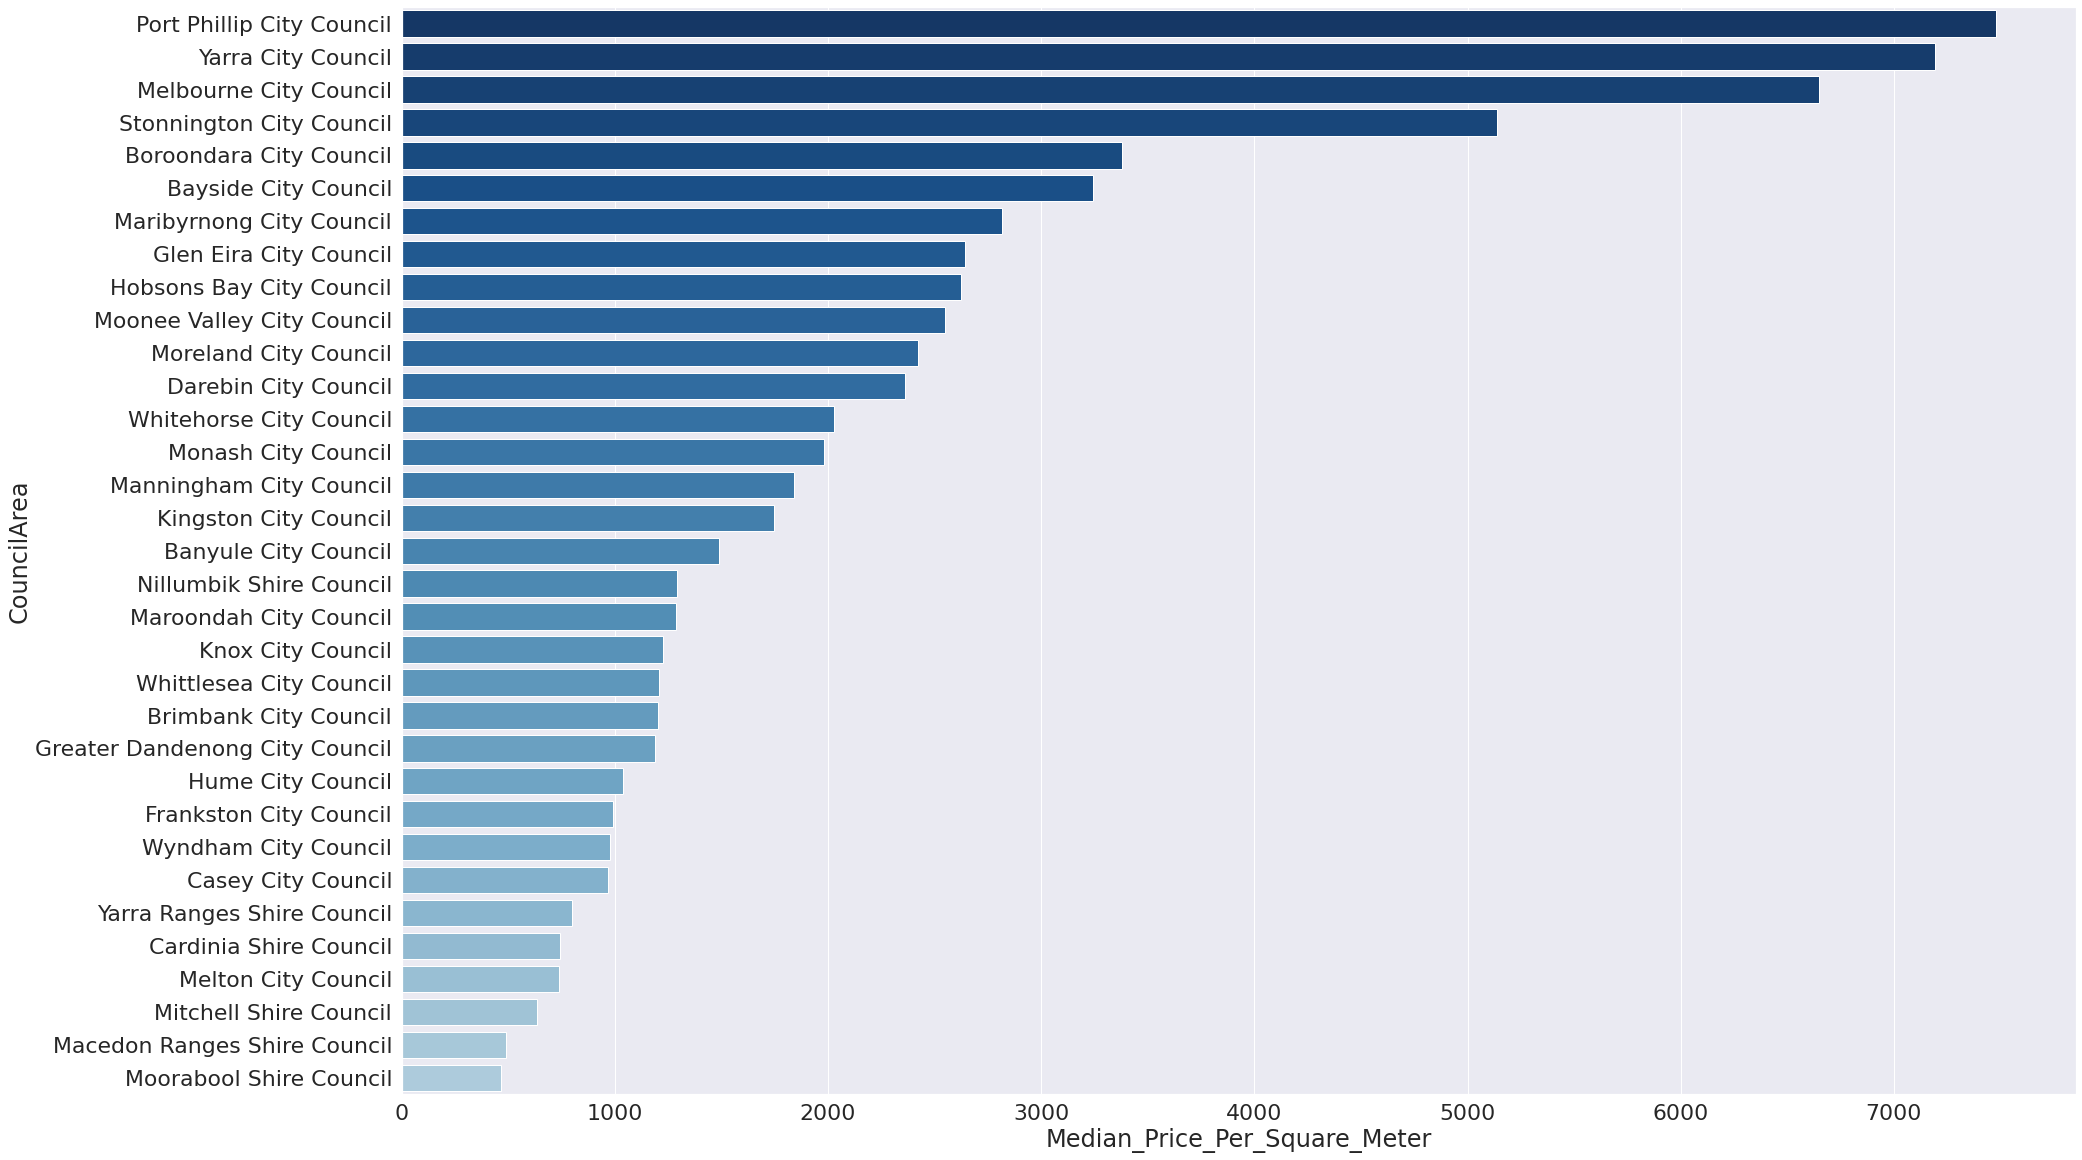

In [32]:
#Visualization Ranking
f, ax = plt.subplots(figsize=(30, 20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
sns.set(font_scale = 2)
sns.barplot(data=Median_Price_Per_Square_Meter, x = 'Median_Price_Per_Square_Meter',y = 'CouncilArea',palette=sns.color_palette('Blues_r',50))
plt.show()

In [33]:
# Remove ' City Council'
Mel_full['CouncilArea'] = Mel_full['CouncilArea'].str.replace(' City Council','')

In [34]:
# Remove ' Council'
Mel_full['CouncilArea'] = Mel_full['CouncilArea'].str.replace(' Council','')

Save datasets locally for Tableau to visualize data

In [35]:
Mel_full.to_csv('Mel_full_new.csv', index=False)

Analyze price changed over time

In [36]:
Price_changed = Mel_full[['Date','Price','CouncilArea','$/m2 land']]

In [37]:
Price_changed['Date'] = pd.to_datetime(Price_changed['Date'])

In [38]:
Price_changed

,Date,Price,CouncilArea,$/m2 land
1,2016-03-12,1480000.0,Yarra,7326.732673
2,2016-04-02,1035000.0,Yarra,6634.615385
4,2017-04-03,1465000.0,Yarra,10932.835821
5,2017-04-03,850000.0,Yarra,9042.553191
6,2016-04-06,1600000.0,Yarra,13333.333333
...,...,...,...,...
34851,2018-02-24,1101000.0,Maribyrnong,3822.916667
34852,2018-02-24,1480000.0,Maribyrnong,2495.784148
34853,2018-02-24,888000.0,Maribyrnong,9061.224490
34854,2018-02-24,705000.0,Maribyrnong,3204.545455


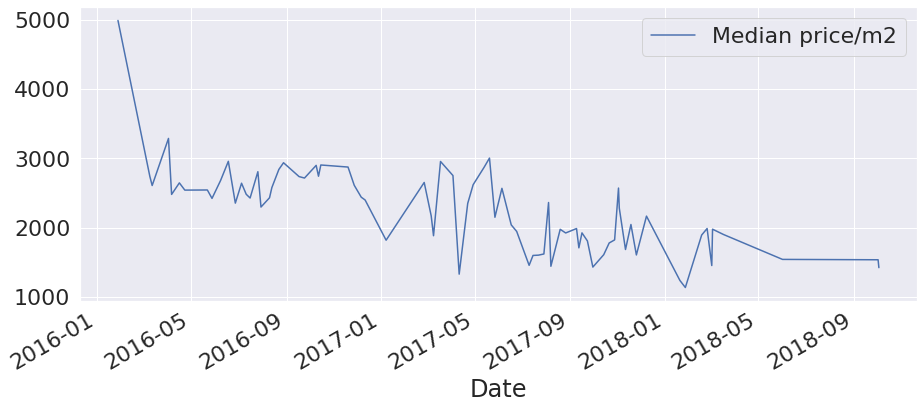

In [39]:
#Change in median price per square meter
Price_changed_median = Price_changed.groupby('Date')['$/m2 land'].median().reset_index(name='Median price/m2')
Price_changed_median.plot(x="Date", y="Median price/m2",figsize=(15,6))
plt.show()

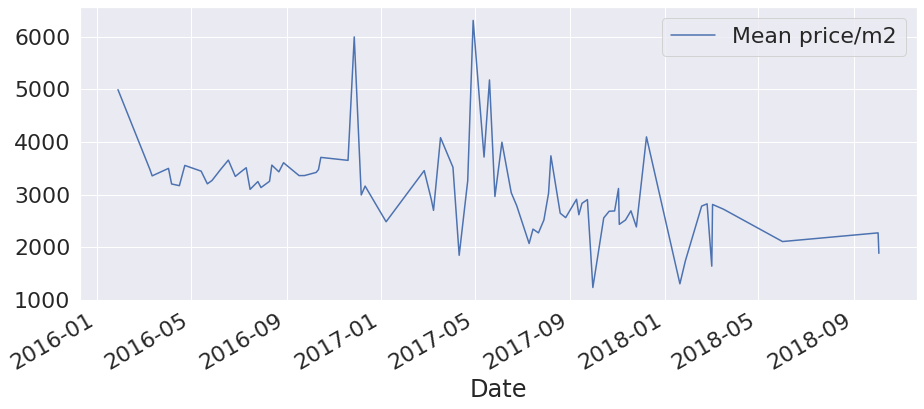

In [40]:
#Change in the average price per square mete
Price_changed_mean = Price_changed.groupby('Date')['$/m2 land'].mean().reset_index(name='Mean price/m2')
Price_changed_mean.plot(x="Date", y="Mean price/m2",figsize=(15,6))
plt.show()

**Machine Learning - Logistic Regression**

In [41]:
Mel_full.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', '$/m2 land'],
      dtype='object')

In [42]:
Mel_full.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            6
Bathroom            9
Car               281
Landsize            0
BuildingArea     7709
YearBuilt        6696
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
$/m2 land           0
dtype: int64

In [43]:
df = Mel_full[['Suburb','Rooms','Type','Bathroom','Car','Postcode','Landsize','Regionname','CouncilArea','Price']]

In [44]:
df

,Suburb,Rooms,Type,Bathroom,Car,Postcode,Landsize,Regionname,CouncilArea,Price
1,Abbotsford,2,h,1.0,1.0,3067.0,202.0,Northern Metropolitan,Yarra,1480000.0
2,Abbotsford,2,h,1.0,0.0,3067.0,156.0,Northern Metropolitan,Yarra,1035000.0
4,Abbotsford,3,h,2.0,0.0,3067.0,134.0,Northern Metropolitan,Yarra,1465000.0
5,Abbotsford,3,h,2.0,1.0,3067.0,94.0,Northern Metropolitan,Yarra,850000.0
6,Abbotsford,4,h,1.0,2.0,3067.0,120.0,Northern Metropolitan,Yarra,1600000.0
...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,3,h,1.0,NaN,3013.0,288.0,Western Metropolitan,Maribyrnong,1101000.0
34852,Yarraville,4,h,1.0,3.0,3013.0,593.0,Western Metropolitan,Maribyrnong,1480000.0
34853,Yarraville,2,h,2.0,1.0,3013.0,98.0,Western Metropolitan,Maribyrnong,888000.0
34854,Yarraville,2,t,1.0,2.0,3013.0,220.0,Western Metropolitan,Maribyrnong,705000.0


In [45]:
#Set the price of more than 1 million to 1 and the value of less than 1 million to 0
df['target']=df['Price'].apply(lambda x: 1 if x >= 1000000 else 0)

In [46]:
#drop price column
df.drop('Price',axis=1,inplace=True)

In [47]:
#drop the null value
df.dropna(axis=0,how='any',inplace=True)

In [48]:
df.shape

(15740, 10)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
df[['Suburb','Type','Postcode','Regionname','CouncilArea']] = df[['Suburb','Type','Postcode','Regionname','CouncilArea']].apply(LabelEncoder().fit_transform)

In [51]:
df

,Suburb,Rooms,Type,Bathroom,Car,Postcode,Landsize,Regionname,CouncilArea,target
1,0,2,0,1.0,1.0,52,202.0,2,31,1
2,0,2,0,1.0,0.0,52,156.0,2,31,1
4,0,3,0,2.0,0.0,52,134.0,2,31,1
5,0,3,0,2.0,1.0,52,94.0,2,31,0
6,0,4,0,1.0,2.0,52,120.0,2,31,1
...,...,...,...,...,...,...,...,...,...,...
34849,326,3,0,2.0,2.0,178,404.0,2,29,0
34852,330,4,0,1.0,3.0,6,593.0,6,16,1
34853,330,2,0,2.0,1.0,6,98.0,6,16,0
34854,330,2,1,1.0,2.0,6,220.0,6,16,0


<AxesSubplot:xlabel='target', ylabel='count'>

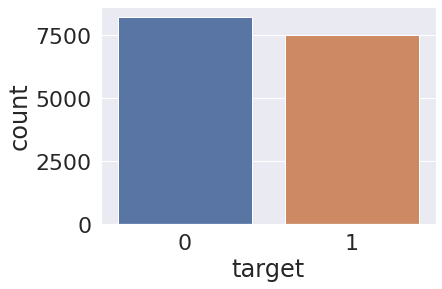

In [52]:
sns.countplot(x='target',data=df)

<AxesSubplot:>

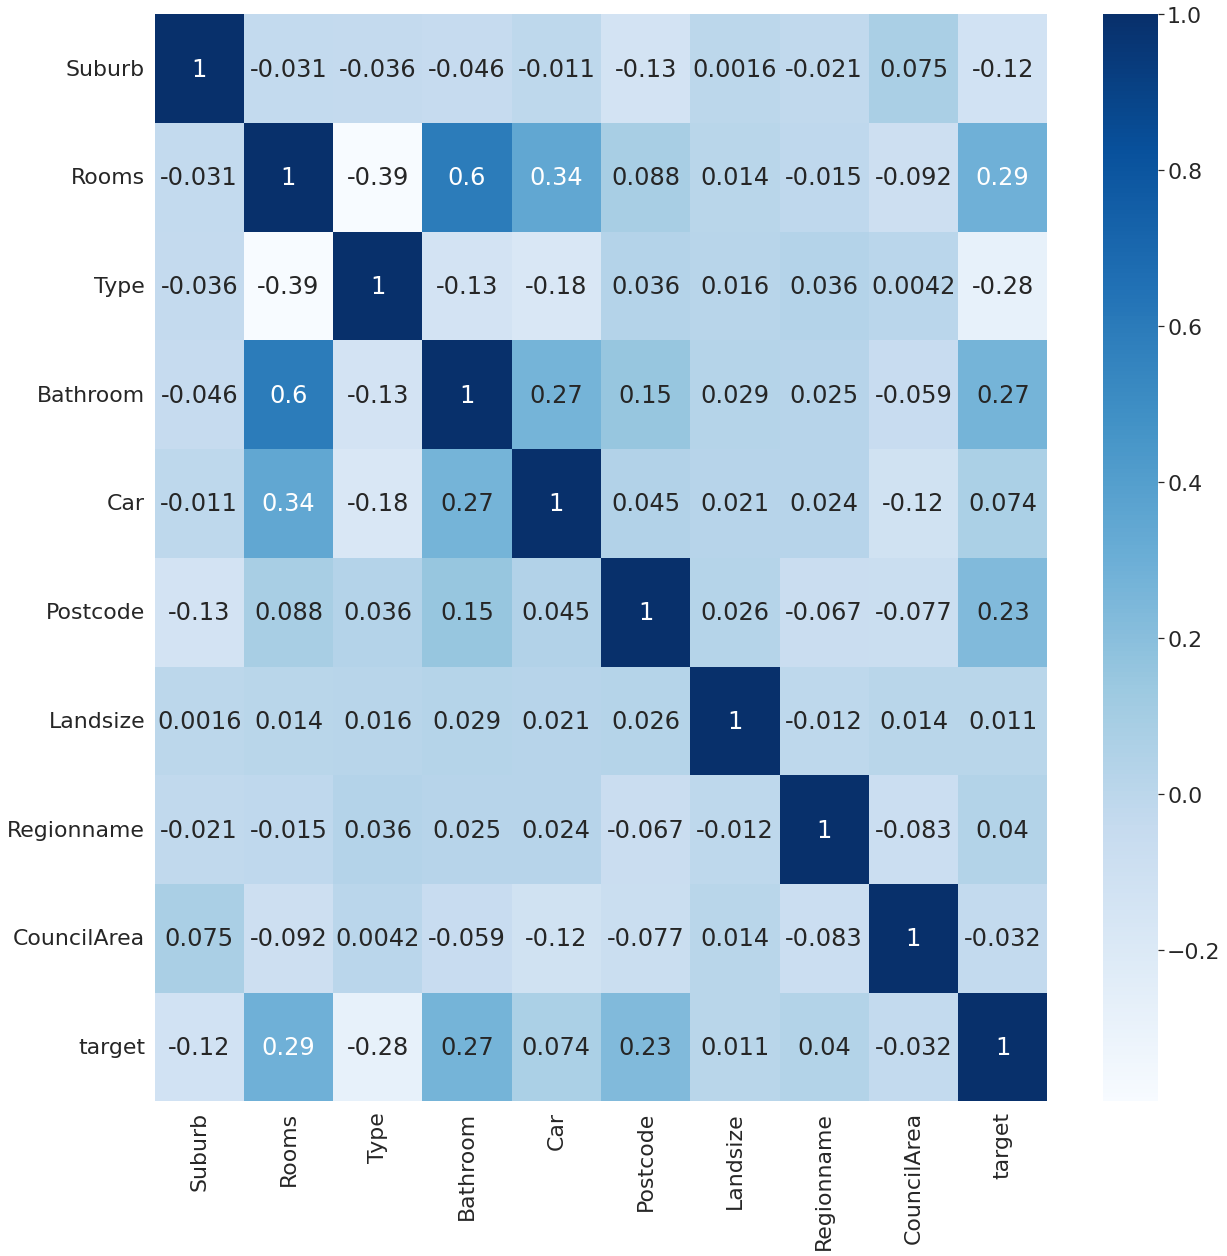

In [53]:
#Create a heatmap that displays the correlation between all the columns.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [54]:
X = df.drop('target',axis=1)
y = df['target']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [57]:
scaler = StandardScaler()

In [58]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegressionCV 

In [60]:
log_model = LogisticRegressionCV()

In [61]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [62]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [63]:
log_model.coef_

array([[-0.15270075,  0.23805606, -0.38964248,  0.24282951, -0.05674865,
         0.31623561,  0.01077281,  0.08524231,  0.00303826]])

In [64]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [65]:
coefs = coefs.sort_values()

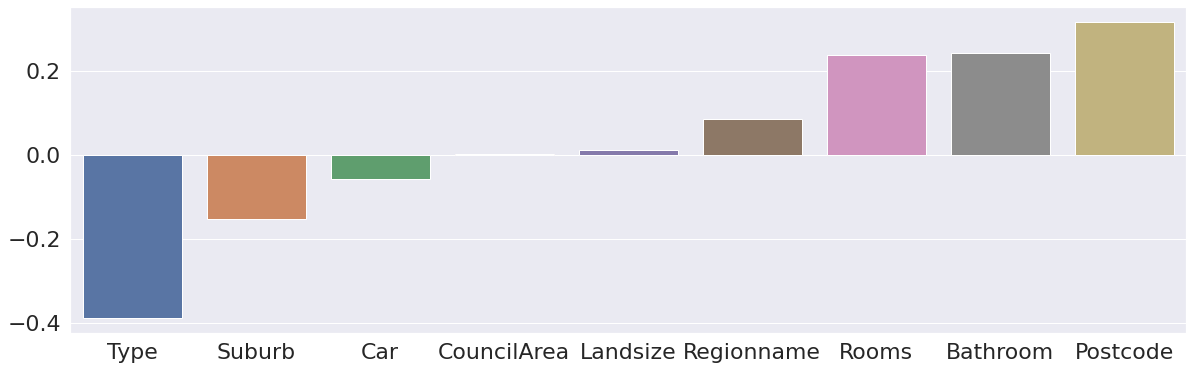

In [66]:
# visualize the coefficients 
plt.figure(figsize=(20,6))
sns.barplot(x=coefs.index,y=coefs.values);

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [68]:
y_pred = log_model.predict(scaled_X_test)

In [69]:
confusion_matrix(y_test,y_pred)

array([[1177,  430],
       [ 529, 1012]])

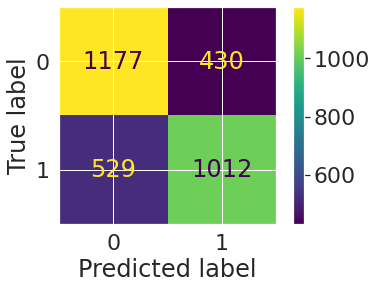

In [70]:
#visualize the confusion matrix
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1607
           1       0.70      0.66      0.68      1541

    accuracy                           0.70      3148
   macro avg       0.70      0.69      0.69      3148
weighted avg       0.70      0.70      0.69      3148

